In [1]:

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model

import os
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

import statsmodels.api as sm

from sklearn.feature_selection import RFE


In [10]:
path = os.getcwd()
data = pd.read_csv(path + "/base_datos_2008.csv")

## Seleccion de variables en Machine Learning
- con stats.api es posible visulizar los datos como si fuera un output de R
- Es posible obtener un analisis estadistico de los datos empleados
- De esta forma podemos listar diferentes variables que puedan ser relevantes para elaborar un modelo
- Es posible determinar aquellas variables que mejor se adaptan al modelo al comprobar aquellas que tienen una P<0.5 aprox

In [ ]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut','DayOfWeek', 'DayofMonth', 'Month', 'DepDelay'])
de = df.sample(frac=1).head(1000)

In [ ]:
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()
regr.fit(X, Y)
predicciones = regr.predict(X)

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

## Seleccion automatizada de variables

- Se comienza cargando el dataframe con todas las variables y se asignan a X e Y.
- Posteriormente se realiza un modelo
- Se crea un selector con el que se carga el modelo y el numero de variables a estudiar
- En el caso de indicar que se selecciona 1 variable, al imprimir el ranking de variables aparecerá la que mejor sirve para luego estudiar el modelo
- En el caso de indicar un numero mayor, aparecerán más variables

In [ ]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut','DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay'])
de = df.sample(frac=1).head(10000)
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut','DayOfWeek', 'DayofMonth', 'Month', 'DepDelay', 'WeatherDelay']]
Y = df['ArrDelay']

regr = linear_model.LinearRegression()

In [ ]:
selector = RFE(estimator=regr, n_features_to_select=1)
selector.fit(X,Y)

In [ ]:
print(selector.ranking_)

In [ ]:
X.columns[selector.support_]

## Seleccion de parámetros en Machine Learning

- Como en las anteriores explicaciones, se comienza cargando el dataframe seún las variables que interesan y se definirán aquellos parámetros más optimos para el ejercicio

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pandas as pd

In [12]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay'])
df = df.sample(frac = 1).head(1000)
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay']]
Y = df['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
alphas = [0.000001, 0.0001, 0.01, 0.1]
layers = [2,5,10,50,100]
solvers = ["lbfgs", "adam"]

In [14]:
print(len(alphas)*len(layers)*len(solvers))

40


In [16]:
for alpha in alphas:
    for layer in layers:
        for solver in solvers:
            clf = MLPRegressor(solver=solver, alpha=alpha, hidden_layer_sizes=(layer,),warm_start=True, max_iter=10000)
            model = clf.fit(X_train, y_train)
            predictions = model.predict(X_test)
            print("R cuadrado: ", r2_score(y_test, predictions), " Solver: ", solver, " Layers: ", layer, " Alpha: ", alpha)
            #funciones groupby

R cuadrado:  0.9178201840594333  Solver:  lbfgs Layers:  2  Alpha:  1e-06
R cuadrado:  0.9134116574286499  Solver:  adam Layers:  2  Alpha:  1e-06
R cuadrado:  0.918059670765596  Solver:  lbfgs Layers:  5  Alpha:  1e-06
R cuadrado:  0.9187509483352705  Solver:  adam Layers:  5  Alpha:  1e-06
R cuadrado:  0.9120236940496778  Solver:  lbfgs Layers:  10  Alpha:  1e-06
R cuadrado:  0.9219463409683938  Solver:  adam Layers:  10  Alpha:  1e-06
R cuadrado:  0.8380672894110905  Solver:  lbfgs Layers:  50  Alpha:  1e-06
R cuadrado:  0.9273932719107694  Solver:  adam Layers:  50  Alpha:  1e-06
C:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
R cuadrado

## Implementacion de la seleccion de parametros automatizada

- Para ello emplearemos la funcion GridSearchCV de sklearn
- Los datos iniciales que se usarán son los mismos que en el apartado anterior

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pandas as pd

In [25]:
parametros = {
    "alpha": [0.0001, 0.01, 0.00001],
    "hidden_layer_sizes": [2,5,10,50,100],
    "solver": ["lbfgs", "adam"],
    "learning_rate": ('constant', 'adaptive')
}

nn = MLPRegressor(warm_start=True, max_iter=100000)
clf = GridSearchCV(nn, parametros, cv=5, n_jobs=-1)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=100000, warm_start=True),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 1e-05],
                         'hidden_layer_sizes': [2, 5, 10, 50, 100],
                         'learning_rate': ('constant', 'adaptive'),
                         'solver': ['lbfgs', 'adam']})

In [26]:
print(clf.best_params_)

{'alpha': 0.01, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


## Fundamentos del principal Component Analysis (PCA)

- PCA es un metodo algebraico que permite reducir la dimensionalidad de matrices
- implica covertir las columnas de 6 a 2 o 3 aplicando una rotacion de los ejes
- Se deben escalar los datos antes de proceder para que por ejemplo las distancias no se comparen en mm con el tiempo en horas


In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
df = data.dropna(subset = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'])
df = df.sample(frac = 1).head(1000)

X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [32]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [33]:
#['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']
print(np.round(pca.components_, 2))

[[ 0.53  0.51  0.23  0.26  0.39  0.43]
 [-0.43 -0.45 -0.12  0.18  0.52  0.55]]


In [35]:
pca.explained_variance_ratio_

array([0.36803179, 0.31141214])

In [36]:
nuevosvalores = pca.transform(X)

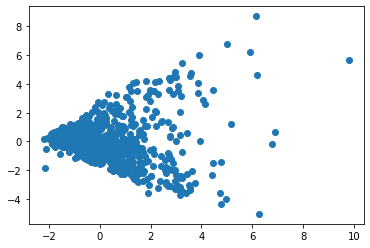

In [37]:
plt.scatter(nuevosvalores[:,0],nuevosvalores[:,1])

## Vairantes de PCA
 
- Incremental PCA: aproxima un resultado sin cargar la base de datos de golpe, lo hace por secciones, por lo que permite trabajar con bases de datos mucho mas grandes, aunque el resultado será menos preciso.
- Kernel PCA: Permite la resolucion de problemas no lineales. Hay qu explorar antes la base de datos.
- Sparce PCA: Estudia bases de datos con mucha vaariabilidad y mucha cantidad de ceros. Como el algoritmo de Netflix donde la mayyoria de usuarios no ha visto una gran cantidad de peliculas.

## Imputación de valores en Machine Learning

- Cuando tenemos una base de datos con muchas variables sin valores. Por ejemplo donde haya muchos NaN, sustituiremos dicho valor por uno. 
- 

In [38]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import numpy as np
import pandas as pd

In [39]:
df = data.sample(frac=1).head(10000)
X = df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay', 'CarrierDelay']]

In [40]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
2148199,60.0,370,8.0,8.0,-4.0,-10.0,NaN
3126247,NaN,372,NaN,NaN,NaN,NaN,NaN
4922982,65.0,446,5.0,12.0,10.0,7.0,NaN
2978675,99.0,745,8.0,30.0,-7.0,-5.0,NaN
2797918,41.0,122,6.0,13.0,-3.0,7.0,NaN
...,...,...,...,...,...,...,...
2872454,104.0,733,6.0,13.0,-4.0,-6.0,NaN
5220374,64.0,426,5.0,10.0,-4.0,-15.0,NaN
4330938,132.0,1046,4.0,7.0,-5.0,-21.0,NaN
920438,103.0,743,11.0,17.0,12.0,4.0,NaN


In [42]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(X)

SimpleImputer()

In [43]:
X2 = imp.fit_transform(X)

In [44]:
pd.DataFrame(X2)

,0,1,2,3,4,5,6
0,60.000000,370.0,8.000000,8.000000,-4.000000,-10.000000,14.39348
1,104.500256,372.0,6.822531,16.450566,9.702275,7.905595,14.39348
2,65.000000,446.0,5.000000,12.000000,10.000000,7.000000,14.39348
3,99.000000,745.0,8.000000,30.000000,-7.000000,-5.000000,14.39348
4,41.000000,122.0,6.000000,13.000000,-3.000000,7.000000,14.39348
...,...,...,...,...,...,...,...
9995,104.000000,733.0,6.000000,13.000000,-4.000000,-6.000000,14.39348
9996,64.000000,426.0,5.000000,10.000000,-4.000000,-15.000000,14.39348
9997,132.000000,1046.0,4.000000,7.000000,-5.000000,-21.000000,14.39348
9998,103.000000,743.0,11.000000,17.000000,12.000000,4.000000,14.39348


In [46]:
X.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
AirTime,1.000000,0.983723,0.084848,0.101716,0.034677,0.038473,-0.014320
Distance,0.983723,1.000000,0.079280,0.087614,0.032969,0.011946,0.002939
TaxiIn,0.084848,0.079280,1.000000,0.050658,0.013022,0.106649,-0.077519
TaxiOut,0.101716,0.087614,0.050658,1.000000,0.083200,0.313812,-0.109615
DepDelay,0.034677,0.032969,0.013022,0.083200,1.000000,0.931700,0.437393
ArrDelay,0.038473,0.011946,0.106649,0.313812,0.931700,1.000000,0.384858
CarrierDelay,-0.014320,0.002939,-0.077519,-0.109615,0.437393,0.384858,1.000000


In [48]:
X = X.dropna(subset=["DepDelay", "ArrDelay"])
newX = X[["DepDelay", "ArrDelay", "CarrierDelay"]]
newX_train = newX[np.isnan(X.CarrierDelay)==False]

regr = linear_model.LinearRegression()
regr.fit(newX_train[["DepDelay", "ArrDelay"]], newX_train["CarrierDelay"])

LinearRegression()

In [49]:
regr.coef_

array([ 0.34904688, -0.11869351])

In [52]:
valores_imputacion = newX[np.isnan(X.CarrierDelay)]
valores_imputacion = valores_imputacion[["DepDelay", "ArrDelay"]]

In [53]:
nuevos_valores = regr.predict(valores_imputacion)

In [54]:
X.loc[np.isnan(X.CarrierDelay),"CarrierDelay"] = nuevos_valores

In [55]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
2148199,60.0,370,8.0,8.0,-4.0,-10.0,4.336271
4922982,65.0,446,5.0,12.0,10.0,7.0,7.205138
2978675,99.0,745,8.0,30.0,-7.0,-5.0,2.695663
2797918,41.0,122,6.0,13.0,-3.0,7.0,2.667528
6117962,54.0,363,3.0,14.0,-5.0,-15.0,4.580692
...,...,...,...,...,...,...,...
2872454,104.0,733,6.0,13.0,-4.0,-6.0,3.861497
5220374,64.0,426,5.0,10.0,-4.0,-15.0,4.929739
4330938,132.0,1046,4.0,7.0,-5.0,-21.0,5.292853
920438,103.0,743,11.0,17.0,12.0,4.0,8.259312
